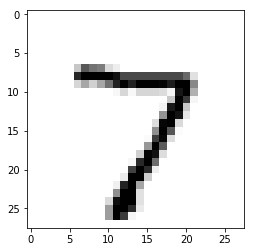

In [3]:
import matplotlib.pyplot
import numpy
#读取数据文件，我们先用小一点的测试文件mnist_test_10.csv来
#请把所有数据放在一个文件夹，以往路径出错
test_file = open("mnist_test_10.csv")​import matplotlib.pyplot
test_data = test_file.readlines()
test_file.close()

#test_data为列表数据，每一行中的785个数字用“，”隔开，我们提取第一个数字“7”的数据并分割
#该数据位于第一行，因此python语言中序号为0
all_values = test_data[0].split(",")

#我们在画图前，需要把数据清洗为画图函数能够识别的数据
#得到像素数据：除了第一个数字7，其他784个数字构成28*28矩阵
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys')

In [31]:
#读入训练数据
train_file = open("mnist_train_1000.csv")
train_data = train_file.readlines()
train_file.close()

#初始权重
#inodes：input nodes
#onodes：output nodes
inodes = 784
onodes = 10
lr = 0.3
wio = numpy.random.normal(0.0, pow(onodes,-0.5),(onodes,inodes))

#建立循环
#获得激活函数
import scipy.special
activation_function = lambda x:scipy.special.expit(x)
for record in train_data:
    all_values = record.split(",")
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    inputs = numpy.array(inputs, ndmin=2).T
    targets = numpy.zeros(10) + 0.01
    targets[int(all_values[0])] = 0.99
    targets = numpy.array(targets, ndmin=2).T
    final_inputs = numpy.dot(wio,inputs)
    outputs = activation_function(final_inputs)
    error =targets - outputs
    wio += lr * numpy.dot((error * outputs *  (1 - outputs)),numpy.transpose(inputs))
    pass

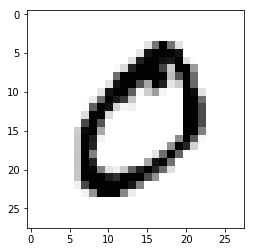

In [49]:
test_file = open("mnist_test_10.csv")
test_list = test_file.readlines()
test_file.close()
all_values = test_list[1].split(',')
image_array = numpy.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array, cmap='Greys')

In [65]:
##验证第一个数据
inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
inputs = numpy.array(inputs, ndmin=2).T
target = all_values[0]
print(target)
type(target)
final_inputs = numpy.dot(wio,inputs)
outputs = activation_function(final_inputs)
print(outputs)
answer = numpy.argmax(outputs)
print(answer)

7


str

In [68]:
test_file = open("mnist_test_100.csv")
test_list = test_file.readlines()
test_file.close()
rate = 0
for record in test_list:
    all_values = record.split(",")
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    inputs = numpy.array(inputs, ndmin=2).T
    target = int(all_values[0])
    final_inputs = numpy.dot(wio,inputs)
    outputs = activation_function(final_inputs)
    answer = numpy.argmax(outputs)
    if answer == target:
        rate += 1
print("100个数里面，我对了{}个".format(rate))

100个数里面，我对了88个
